In [94]:
import pandas as pd
import os

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

## About Dataset
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

link - https://www.kaggle.com/datasets/overload10/adult-census-dataset

age: the age of an individual Integer greater than 0

workclass: a general term to represent the employment status of an individual Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: this is the number of people the census believes the entry represents. Integer greater than 0

education: the highest level of education achieved by an individual. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: the highest level of education achieved in numerical form. Integer greater than 0

marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: the general type of occupation of an individual Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Descriptions of an individual’s race White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: the biological sex of the individual Male, female

capital-gain: capital gains for an individual Integer greater than or equal to 0

capital-loss: capital loss for an individual Integer greater than or equal to 0

hours-per-week: the hours an individual has reported to work per week continuous

native-country: country of origin for an individual United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

the label: whether or not an individual makes more than $50,000 annually. <= 50K, >50K

In [97]:
df = pd.read_csv("D:/Projects/Adult-Census-Income-Prediction/data_given/adult.csv")

In [98]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
print("\n EDA on Complete dataset\n")
print("*"*90)
print("\nFeatures\columns:\n {}".format(df.columns))
print("*"*90)
print("\n\nNo of Rows: {}".format(df.shape[1]))
print("*"*90)
print("\n\nData Type: \n {}".format(df.dtypes))
print("*"*90)
print("\nContains nan values in the cells: {}\n".format(df.isna().values.any()))
print("*"*90)
print("\nTotal Empty cells by columns :\n{}".format(df.isna().sum()),"\n\n")
print("*"*90)


 EDA on Complete dataset

******************************************************************************************

Features\columns:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')
******************************************************************************************


No of Rows: 15
******************************************************************************************


Data Type: 
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object
*********************

In [101]:
df.shape

(32561, 15)

In [102]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [104]:
df.columns=df.columns.str.lower()

In [105]:
df.columns=df.columns.str.replace('-', '_')

In [106]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [107]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [108]:
df.duplicated().sum()

24

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.duplicated().sum()

0

In [111]:
df.nunique()


age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
country              42
salary                2
dtype: int64

In [112]:
df.age.max()

90

In [113]:
df.age.min()

17

In [114]:
df.age.median()

37.0

<Axes: xlabel='age', ylabel='Count'>

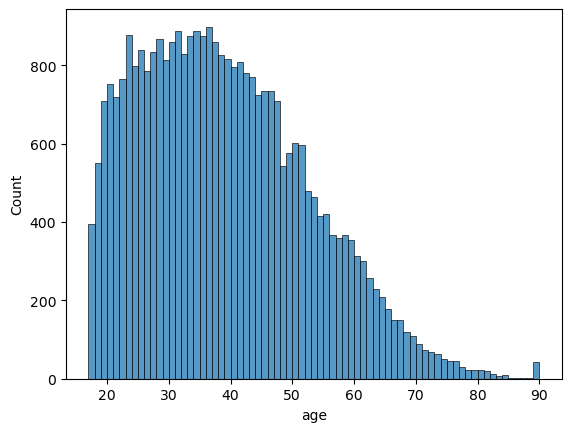

In [115]:
sns.histplot(df.age, bins=73)

In [116]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

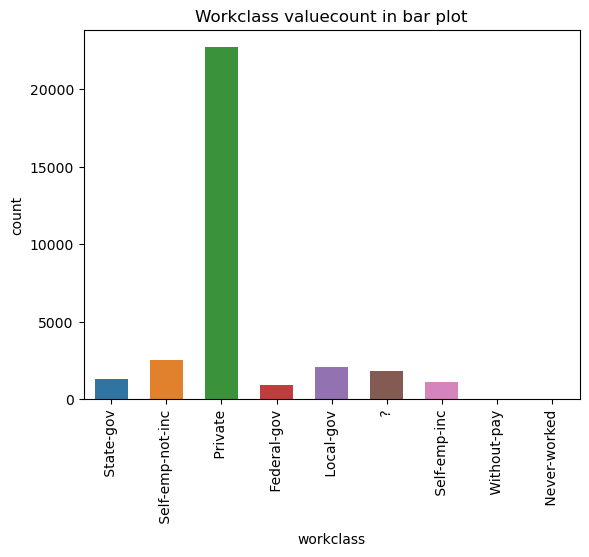

In [117]:
sns.countplot(x=df.workclass,width=0.6, )
plt.title("Workclass valuecount in bar plot")
plt.xticks(rotation=90)

In [118]:
df.workclass.value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Now, here we can see that it consist of missing value as ?, Now what it means
python will only detect NaN as missing not ?. so we have to encode this to NaN and then see.

In [119]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("len of categorical_feature:",len(categorical_feature))

len of categorical_feature: 9


In [120]:
# there is an extra space before each value of categorical column so correct it.
for col in categorical_feature:
    df[col] = df[col].str.strip()

In [121]:
df["workclass"]=='?'

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32537, dtype: bool

In [122]:
df['workclass'] = np.where(df['workclass']=='?',np.NaN, df['workclass'])

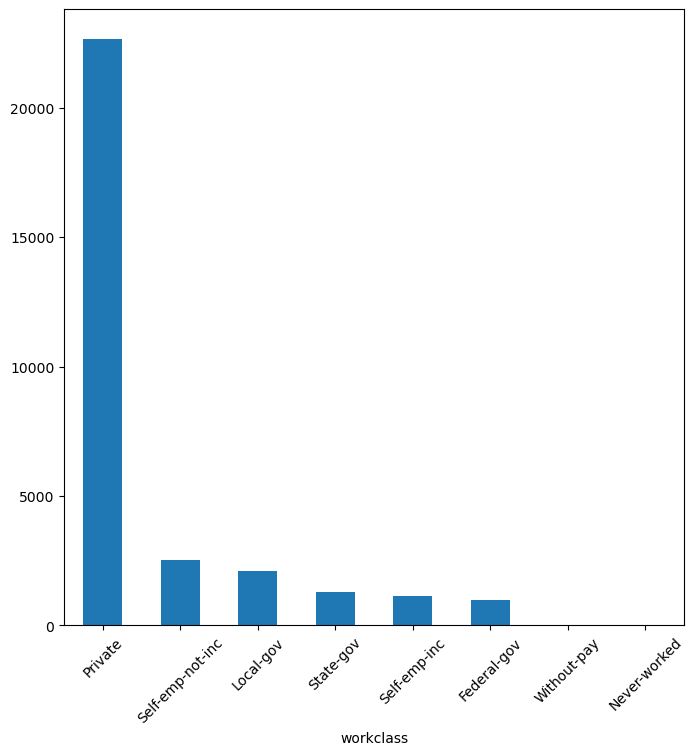

In [123]:
plt.figure(figsize=(8,8))
df['workclass'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [124]:
df[categorical_feature].head()

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [125]:
df.fnlwgt.value_counts()

fnlwgt
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: count, Length: 21648, dtype: int64

In [126]:
df.drop("fnlwgt", axis=1, inplace=True)

In [127]:
df.education.value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [128]:
def plot(data,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    data.value_counts().plot.pie(autopct='%.0f%%')
    plt.title("pie chart for {} column".format(col_name))
 
    plt.show()
    
    

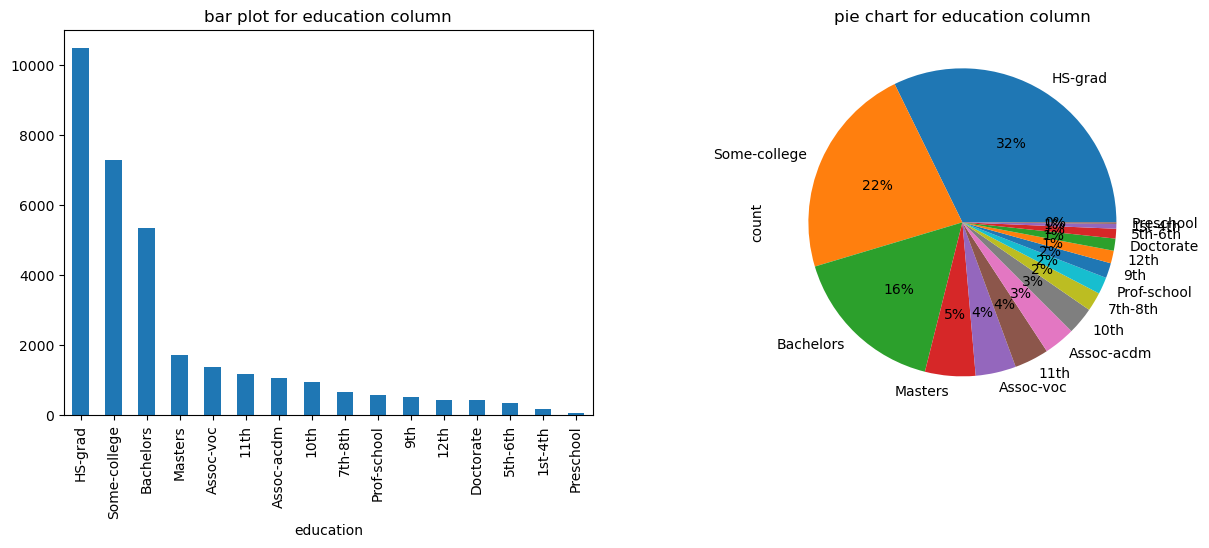

In [129]:
plot(df.education, 'education')

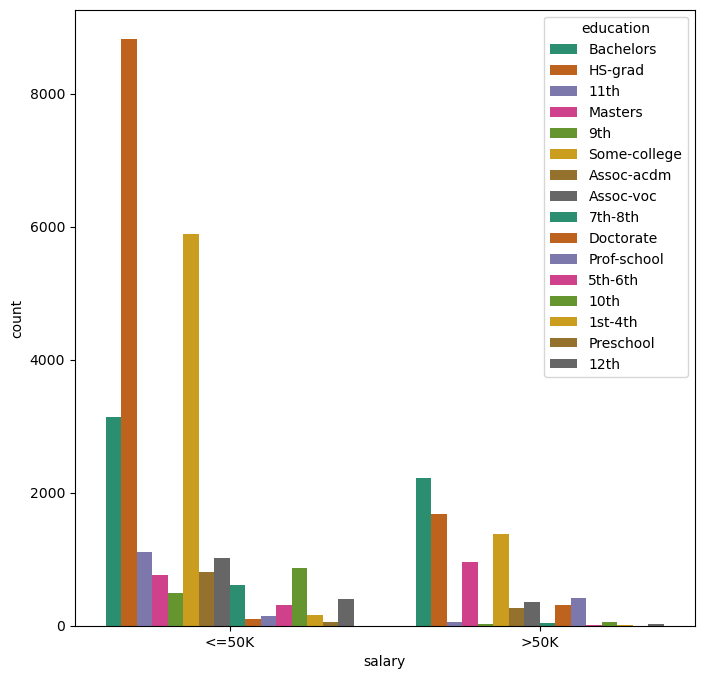

In [130]:
# Education
plt.figure(figsize=(8,8))
#data['education'].value_counts().plot(kind='bar')
sns.countplot(x='salary',hue='education',data=df,palette='Dark2')
plt.show()

In [131]:
df.education_num.value_counts()

education_num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: count, dtype: int64

In [132]:
df.education.value_counts().sort_values()

education
Preschool          50
1st-4th           166
5th-6th           332
Doctorate         413
12th              433
9th               514
Prof-school       576
7th-8th           645
10th              933
Assoc-acdm       1067
11th             1175
Assoc-voc        1382
Masters          1722
Bachelors        5353
Some-college     7282
HS-grad         10494
Name: count, dtype: int64

In [133]:
df.groupby('education')['education_num'].unique().sort_values()

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: education_num, dtype: object

In [134]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [135]:
df.marital_status

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
32556    Married-civ-spouse
32557    Married-civ-spouse
32558               Widowed
32559         Never-married
32560    Married-civ-spouse
Name: marital_status, Length: 32537, dtype: object

In [136]:
df.marital_status.nunique()

7

In [137]:
df.marital_status.value_counts()

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

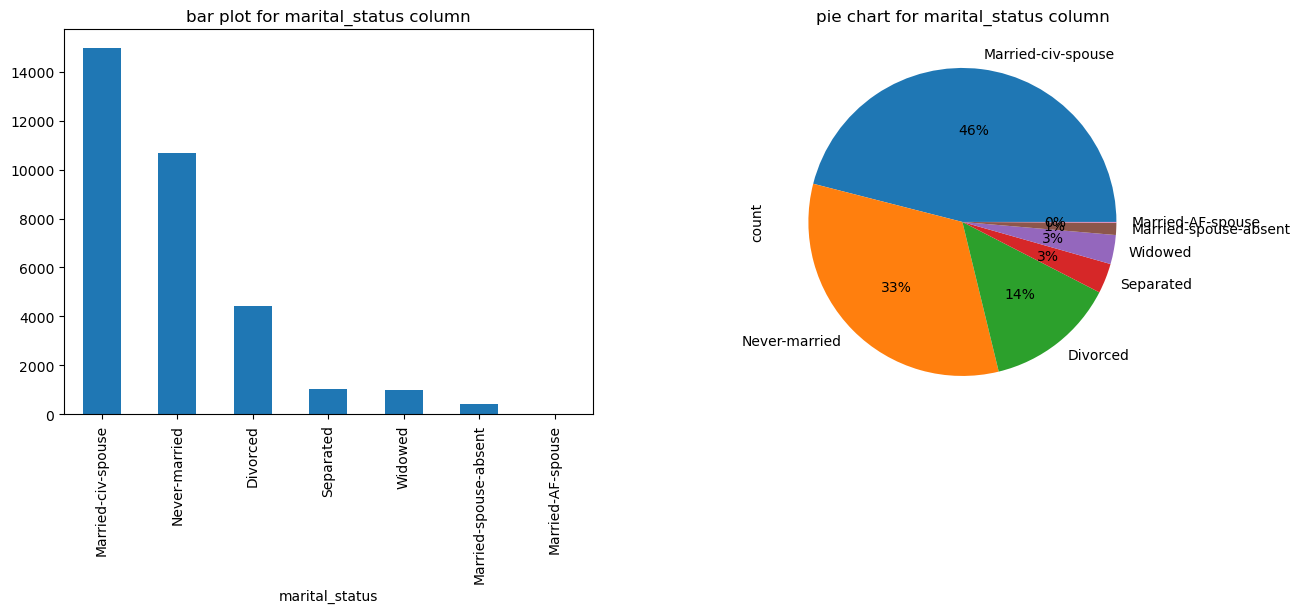

In [138]:
plot(df.marital_status, "marital_status")

In [139]:
df.occupation

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: occupation, Length: 32537, dtype: object

In [140]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [141]:
# same problem in occupation is there
df['occupation'] = np.where(df['occupation']=='?',np.NaN, df['occupation'])

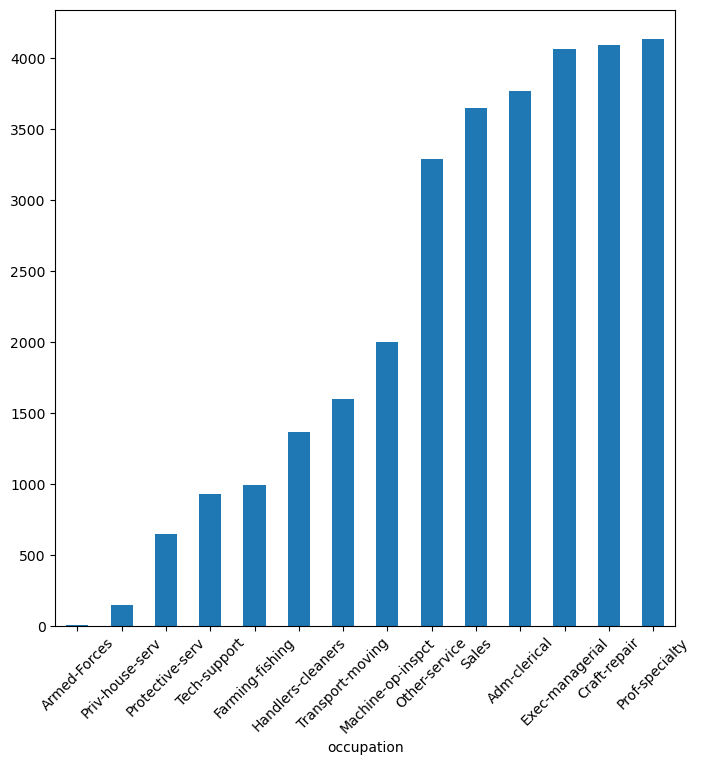

In [142]:
plt.figure(figsize=(8,8))
df['occupation'].value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

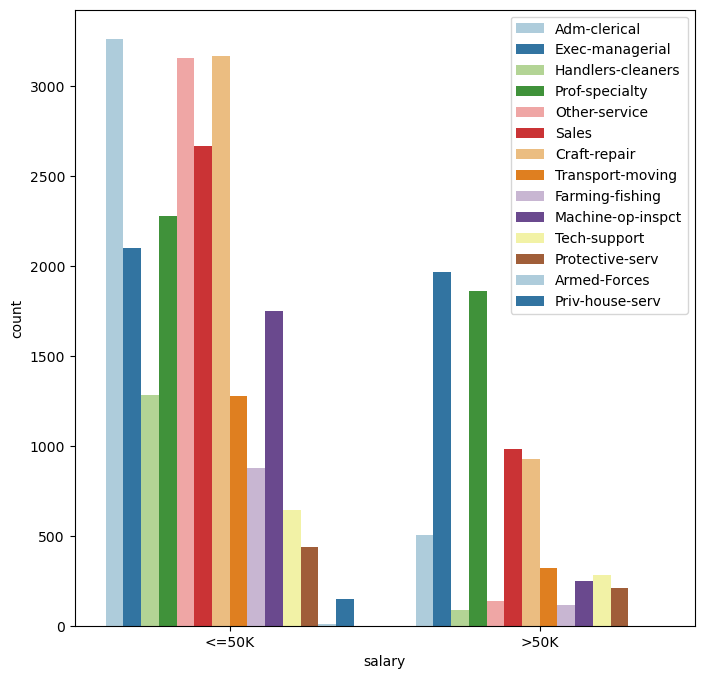

In [143]:
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='occupation',data=df,palette='Paired')
plt.legend(loc='best')
plt.show()

In [144]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [145]:
# relationship
df['relationship'].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

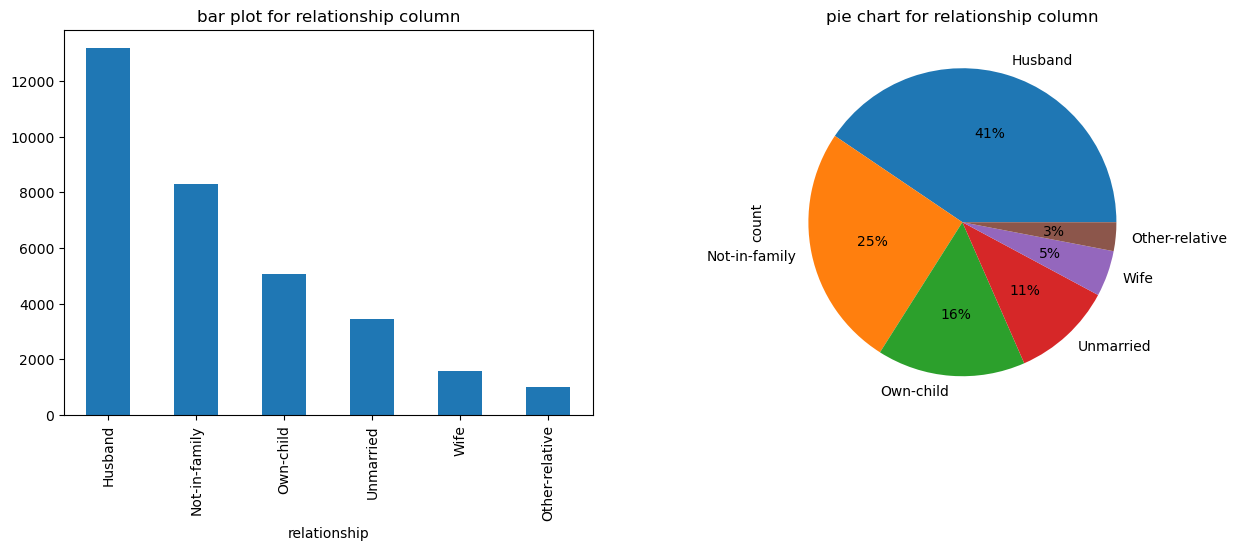

In [146]:
plot(df['relationship'], "relationship")

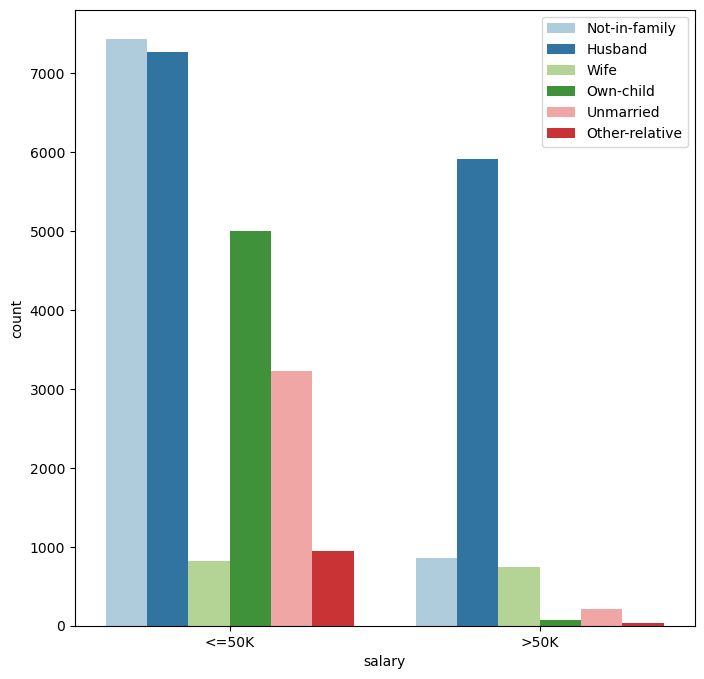

In [147]:
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='relationship',data=df,palette='Paired')
plt.legend(loc='best')
plt.show()

In [148]:
# RACE

In [149]:
df.race.value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

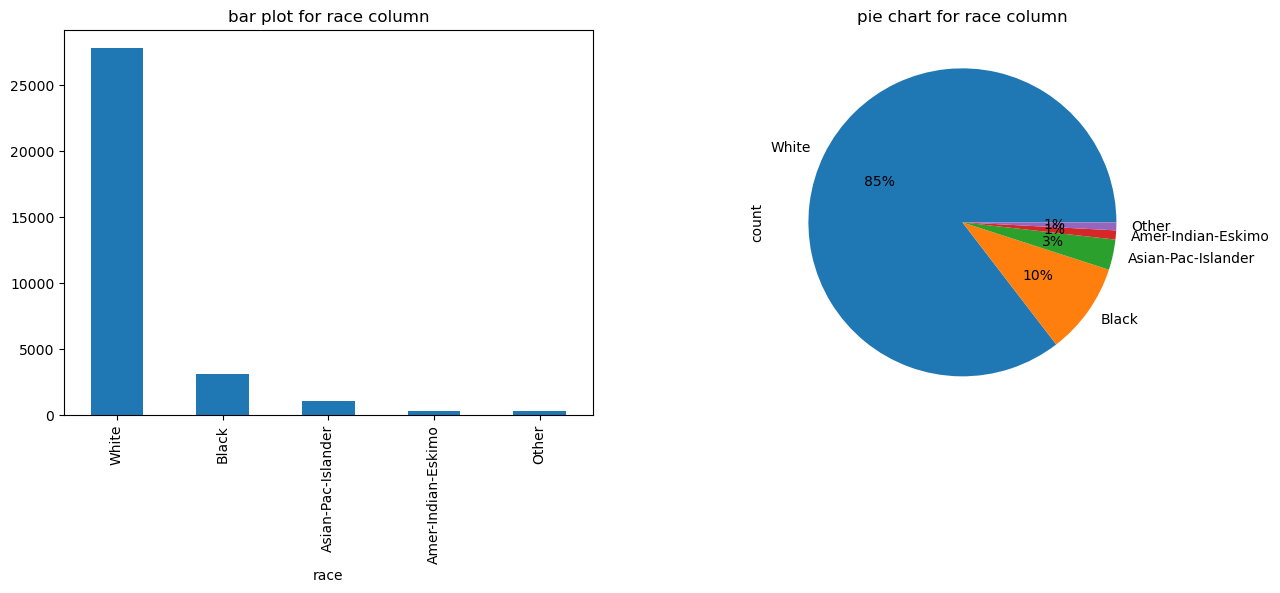

In [150]:
plot(df.race, 'race')

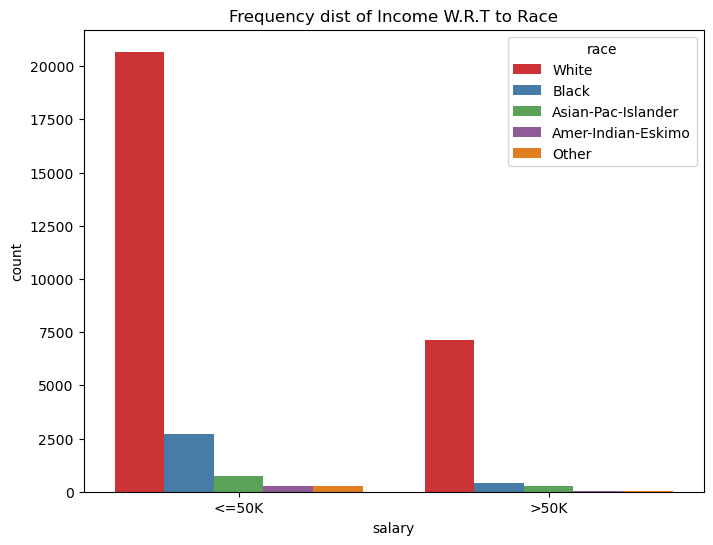

In [151]:
# let's see salary with respect to race
plt.figure(figsize=(8,6))
sns.countplot(x='salary',hue='race',data=df,palette='Set1')
plt.title("Frequency dist of Income W.R.T to Race")
plt.show()

In [152]:
# SEX

In [153]:
df.sex.value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

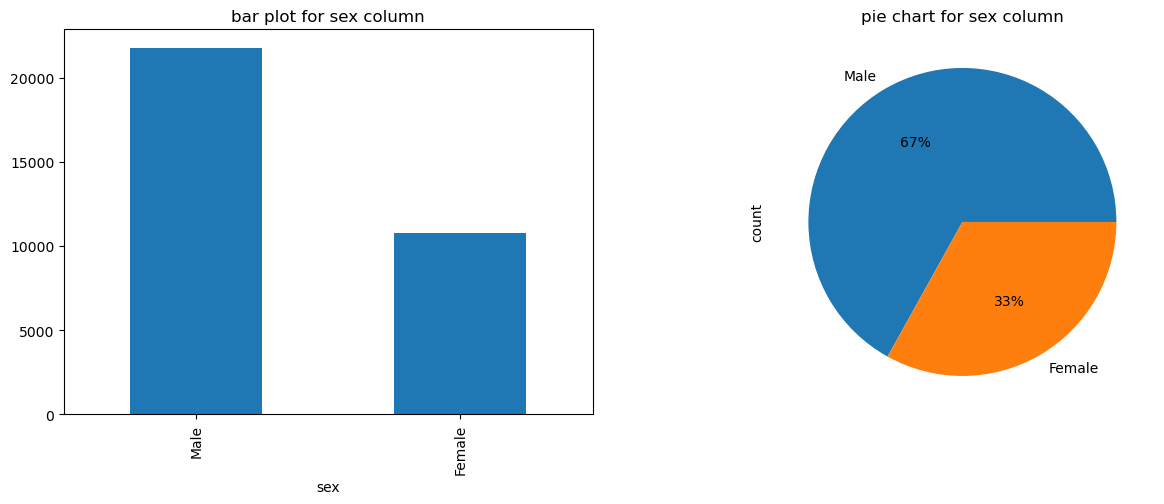

In [154]:
plot(df.sex, 'sex')

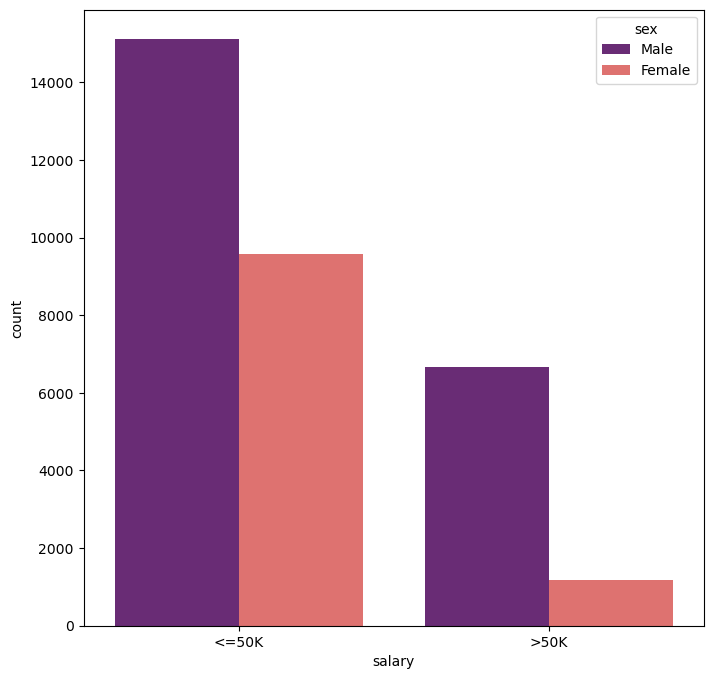

In [155]:
# let's see income with respect to sex
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='sex',data=df,palette='magma')
plt.show()

- By seeing this we can say that whether the salary is whatever the ferquency of male is more in both the fields then female.

In [156]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [157]:
# COUNTRY

In [158]:
df.country

0        United-States
1        United-States
2        United-States
3        United-States
4                 Cuba
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: country, Length: 32537, dtype: object

In [159]:
df.country.value_counts()

country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France              

In [160]:
df['country'].replace('?',np.NaN,inplace=True) 

In [161]:
df.country.value_counts()

country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

NUMERICAL fEATURES

In [162]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print("len of numerical_feature:",len(numerical_feature))

len of numerical_feature: 5


In [163]:
df[numerical_feature].head()


,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


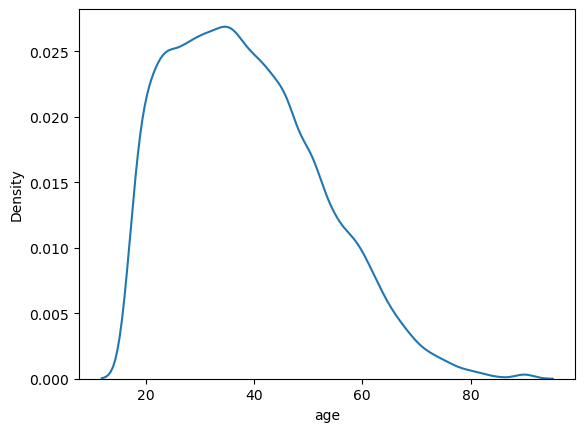

In [164]:
sns.set_color_codes()
sns.distplot(df['age'],hist=False)
plt.show()

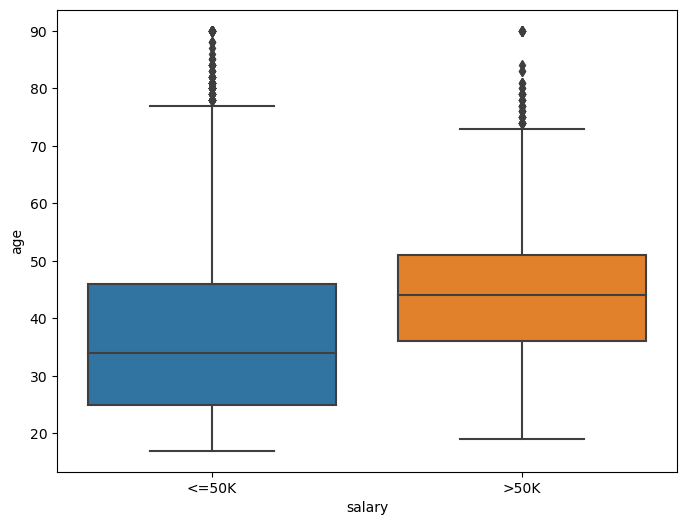

In [165]:
# Income wrt age
plt.figure(figsize=(8,6))
sns.boxplot(x='salary',y='age',data=df)
plt.show()

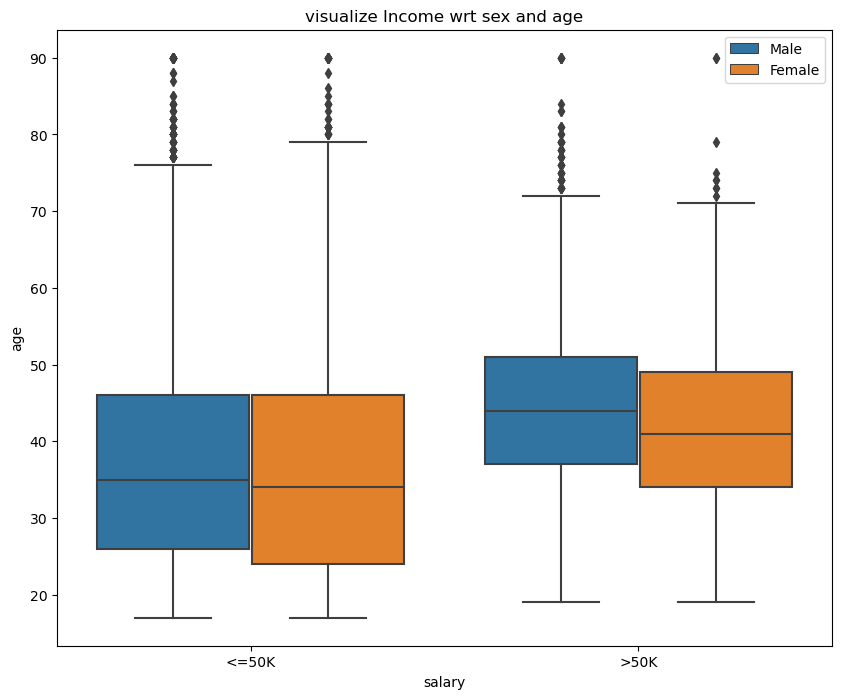

In [166]:
# Income wrt age
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='age',hue='sex',data=df)
ax.set_title("visualize Income wrt sex and age")
ax.legend(loc='best')
plt.show()

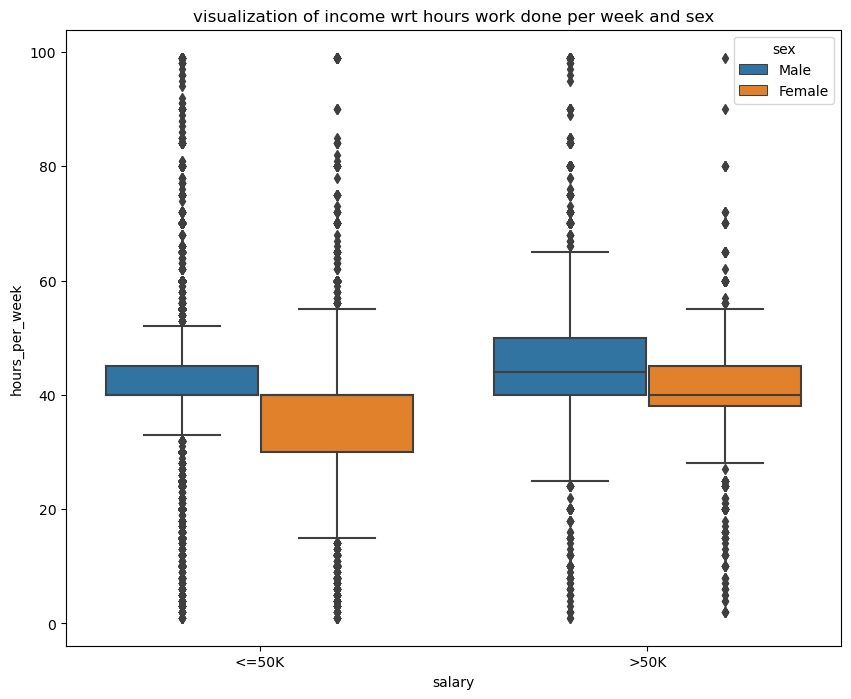

In [167]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='hours_per_week',hue='sex',data=df)
ax.set_title("visualization of income wrt hours work done per week and sex")
plt.show()

In [168]:
df.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

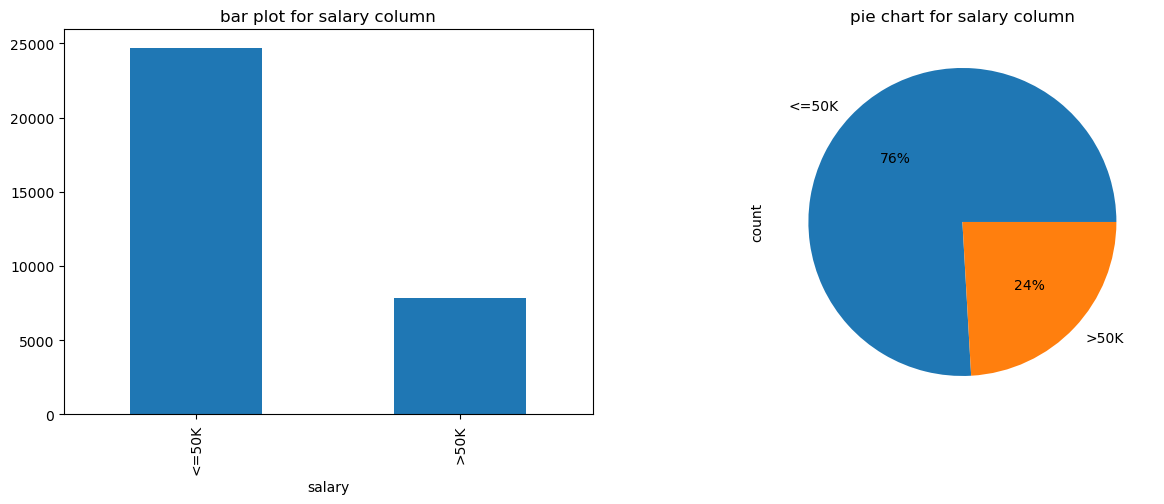

In [169]:
plot(df.salary, 'salary')

Impute missing values

In [170]:
df[categorical_feature].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
country            582
salary               0
dtype: int64

In [171]:
for col in categorical_feature:
    if (df[col].isnull().mean()>0):
        print(col, ' ', df[col].isnull().mean())

workclass   0.05642806650889756
occupation   0.05664320619602299
country   0.017887328272428313


In [172]:
df['workclass'].mode()[0]

'Private'

In this case we can use Frequent Category Imputation and Random Sampling Imputation Both. both will work fine.

0    Private
Name: workclass, dtype: object

In [173]:
df.workclass.fillna(df['workclass'].mode()[0], inplace=True)

In [174]:
df.workclass.isna().sum()

0

In [179]:
df.occupation.fillna(df['occupation'].mode()[0], inplace=True)

In [180]:
df.occupation.isna().sum()

0

In [184]:
df.country.fillna(df.country.mode()[0], inplace=True)

In [185]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [186]:
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Categorical Encoding

In [187]:
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
df.sex = pd.get_dummies(df.sex, drop_first=True, dtype='int')

In [190]:
df.salary = pd.get_dummies(df.salary, drop_first=True, dtype='int')

In [191]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [192]:
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'country']

In [193]:
df.workclass

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32537, dtype: object

In [194]:
df.groupby('workclass')['salary'].mean().sort_values().index

Index(['Never-worked', 'Without-pay', 'Private', 'State-gov',
       'Self-emp-not-inc', 'Local-gov', 'Federal-gov', 'Self-emp-inc'],
      dtype='object', name='workclass')

In [195]:
for col in categorical:
    labels = df.groupby(col)['salary'].mean().sort_values().index
    print(col,'\n',labels,'\n')

workclass 
 Index(['Never-worked', 'Without-pay', 'Private', 'State-gov',
       'Self-emp-not-inc', 'Local-gov', 'Federal-gov', 'Self-emp-inc'],
      dtype='object', name='workclass') 

education 
 Index(['Preschool', '1st-4th', '5th-6th', '11th', '9th', '7th-8th', '10th',
       '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
      dtype='object', name='education') 

marital_status 
 Index(['Never-married', 'Separated', 'Married-spouse-absent', 'Widowed',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse'],
      dtype='object', name='marital_status') 

occupation 
 Index(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', 'Armed-Forces',
       'Farming-fishing', 'Machine-op-inspct', 'Adm-clerical',
       'Transport-moving', 'Craft-repair', 'Sales', 'Tech-support',
       'Protective-serv', 'Prof-specialty', 'Exec-managerial'],
      dtype='object', name='occupation') 

relationship 
 Index([

In [196]:
for col in categorical:
    labels = df.groupby(col)['salary'].mean().sort_values().index
    mapping_dict = {k: i for i, k in enumerate(labels, 0)}
    # apply encoding to our data
    df[col] = df[col].map(mapping_dict)

In [197]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,3,12,13,0,6,3,3,1,2174,0,40,23,0
1,50,4,12,13,6,13,4,3,1,0,0,13,23,0
2,38,2,8,9,4,2,3,3,1,0,0,40,23,0
3,53,2,3,7,6,2,4,2,1,0,0,40,23,0
4,28,2,12,13,6,12,5,2,0,0,0,40,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,10,12,6,10,5,3,0,0,0,38,23,0
32557,40,2,8,9,6,5,4,3,1,0,0,40,23,1
32558,58,2,8,9,3,6,2,3,0,0,0,40,23,0
32559,22,2,8,9,0,6,0,3,1,0,0,20,23,0


In [198]:
import scipy.stats as stat
import pylab   # for probability plot

In [199]:
def plot_data(df,variable):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[variable],dist='norm',plot=pylab)
    plt.show()

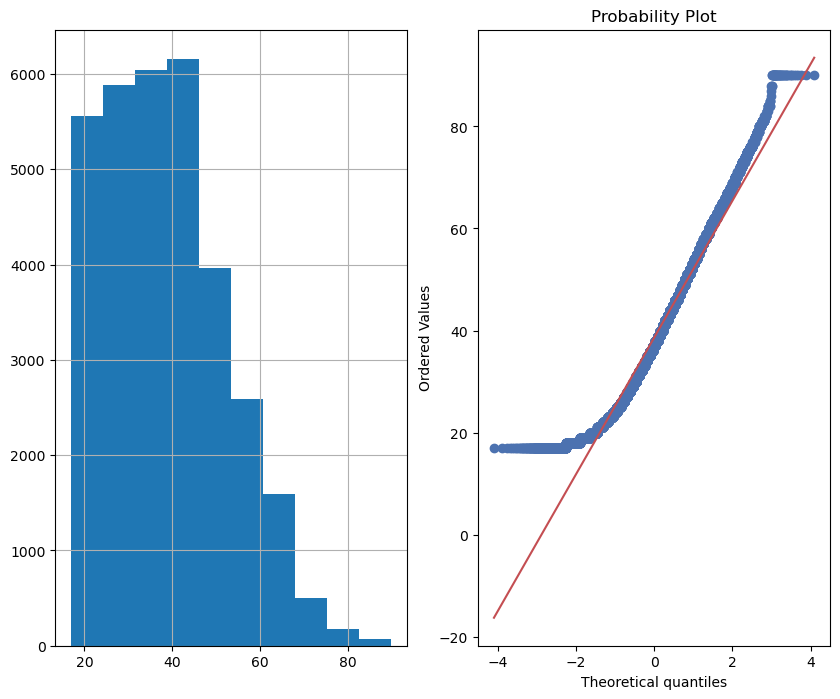

In [200]:
plot_data(df,'age')

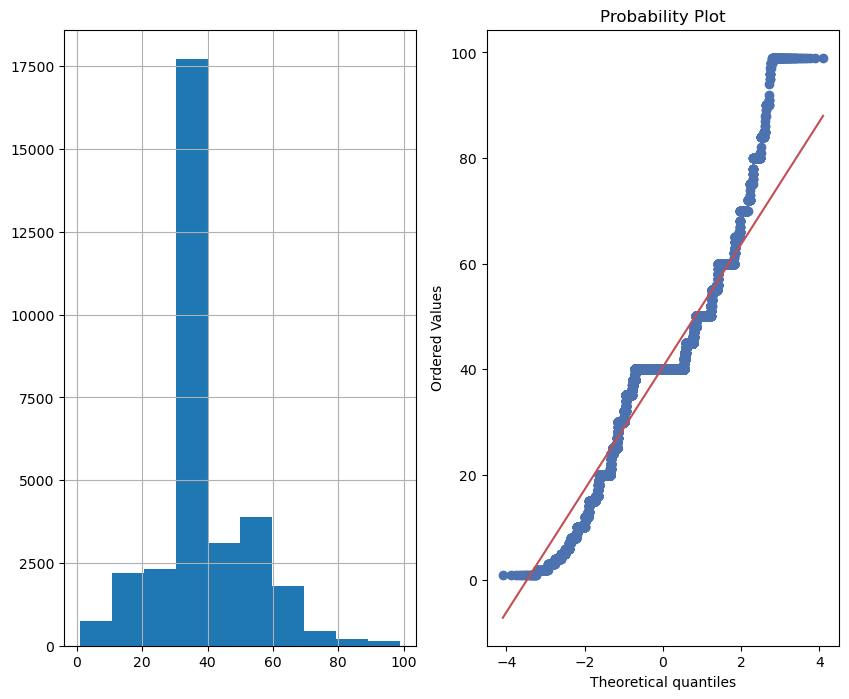

In [201]:
plot_data(df,'hours_per_week')

with help of qq plot the age and hours_per_week is approximate or absolutely normally distributed

In [202]:
## Feature selection

In [203]:
df.corr()['salary'].sort_values(ascending=False)

salary            1.000000
marital_status    0.411431
relationship      0.384179
education_num     0.335272
education         0.333337
occupation        0.302004
age               0.234037
hours_per_week    0.229658
capital_gain      0.223336
sex               0.215969
workclass         0.157039
capital_loss      0.150501
country           0.097966
race              0.088513
Name: salary, dtype: float64

In [205]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [206]:
x = df.drop('salary', axis=1)

In [207]:
y = df.salary

In [208]:
x

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country
0,39,3,12,13,0,6,3,3,1,2174,0,40,23
1,50,4,12,13,6,13,4,3,1,0,0,13,23
2,38,2,8,9,4,2,3,3,1,0,0,40,23
3,53,2,3,7,6,2,4,2,1,0,0,40,23
4,28,2,12,13,6,12,5,2,0,0,0,40,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,10,12,6,10,5,3,0,0,0,38,23
32557,40,2,8,9,6,5,4,3,1,0,0,40,23
32558,58,2,8,9,3,6,2,3,0,0,0,40,23
32559,22,2,8,9,0,6,0,3,1,0,0,20,23


In [209]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int32

In [210]:
# FEature scaling

In [211]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X = minmax.fit_transform(x)

In [212]:
extra_tree = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=3)

extra_tree.fit(X,y)

ExtraTreesClassifier(criterion='entropy', max_features=3, n_estimators=5)

In [213]:
feature_imp = extra_tree.feature_importances_
feature_imp

array([0.21524816, 0.04548739, 0.06683291, 0.05890416, 0.1524096 ,
       0.09286037, 0.06125915, 0.02317866, 0.01992222, 0.08861131,
       0.03009551, 0.12350435, 0.0216862 ])

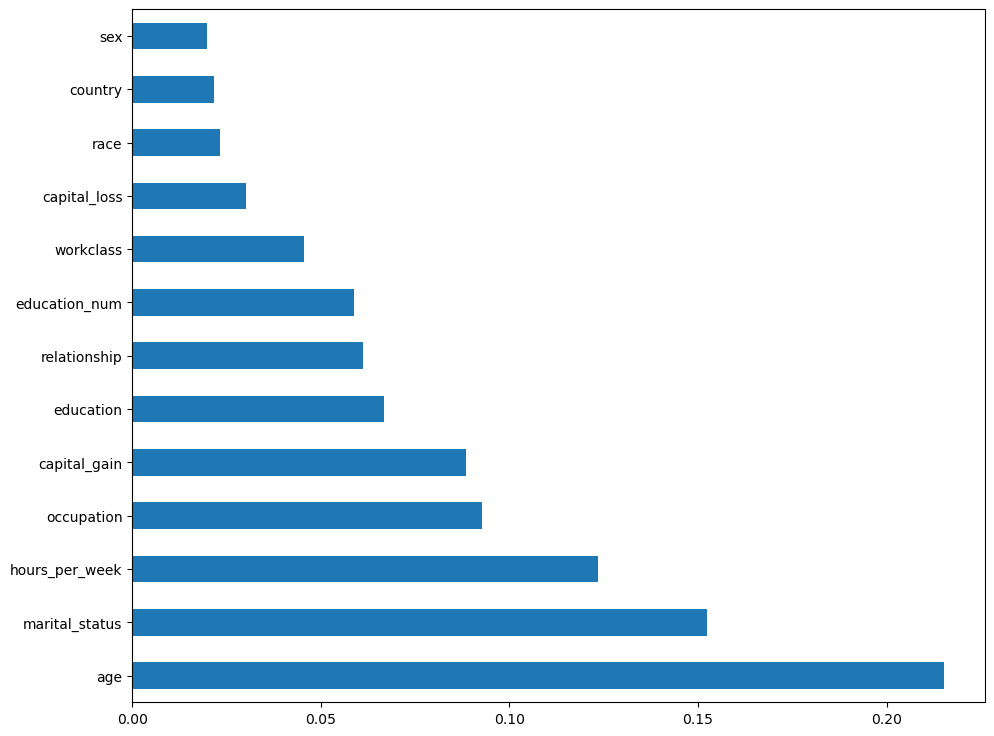

In [214]:
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind = 'barh')
plt.show()

In [215]:
# MODEL FITTING AND TESTING

In [216]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [221]:
for clf in (svc_clf, knn_clf, dt_clf, rf_clf):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

SVC 0.8498770743700061
KNeighborsClassifier 0.8309772587584512
DecisionTreeClassifier 0.8133066994468346
RandomForestClassifier 0.8523355869698832


In [222]:
rf_clf.fit(X_train,y_train)

ypred = rf_clf.predict(X_test)

print("accuracy:",accuracy_score(y_test,ypred))
print("\nclassification_report:\n",classification_report(y_test,y_pred))

accuracy: 0.8563306699446834

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4905
           1       0.73      0.64      0.68      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508



In [ ]:
#Hyper parameter tuning for random forest

In [223]:
#The number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#measure quality of split
criterion = ["gini", "entropy"]
# The maximum depth of the tree.
max_depth = [int(x) for x in np.linspace(6,30,5)]
# The minimum number of samples required to split an internal node:
min_samples_split = [2,7,10,15]
#The minimum number of samples required to be at a leaf node.
min_samples_leaf = [2,5,7]
# The number of features to consider when looking for the best split:
max_features = ['sqrt','auto']

random_grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                  max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'criterion': ['gini', 'entropy'], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10, 15], 'min_samples_leaf': [2, 5, 7], 'max_features': ['sqrt', 'auto']}


In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5,n_iter=15, random_state=42,n_jobs=-1,verbose=1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5, 7],
                                        'min_samples_split': [2, 7, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [227]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 24,
 'criterion': 'entropy'}

In [228]:
rf_random.best_score_


0.8672251148918173

In [231]:
rf_clf = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2,
                                min_samples_leaf= 2,max_features= 'auto',max_depth= 18,
                               criterion= 'entropy')

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print("accuracy:",accuracy_score(y_test,y_pred))
print("\nclassification_report:",classification_report(y_test,y_pred))

accuracy: 0.8523355869698832

classification_report:               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4905
           1       0.73      0.64      0.68      1603

    accuracy                           0.85      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508



In [232]:
import pickle

file = open('incomeclf.pkl','wb')
pickle.dump(rf_clf,file)